# Exercises

In this exercise we will look at how substitution affects the vibrational frequencies, IR, and Raman spectra.

In [2]:
# import section
import veloxchem as vlx
import py3Dmol as p3d
from veloxchem.veloxchemlib import bohr_in_angstroms
from matplotlib import pyplot as plt
import numpy as np

basis_set_label = "6-31G"

* Warning * Environment variable OMP_NUM_THREADS not set.
* Warning * Setting OMP_NUM_THREADS to 8.
* Warning * Setting MKL_THREADING_LAYER to "GNU".


In [3]:
# define molecules and basis sets
ethene_xyz = """6
 ethene
 C          0.000000    -0.663984   0.000000
 C          0.000000     0.663984   0.000000
 H          0.919796    -1.223061   0.000000
 H         -0.919796    -1.223061   0.000000
 H          0.919796     1.223061   0.000000
 H         -0.919796     1.223061   0.000000
"""
ethene = vlx.Molecule.from_xyz_string(ethene_xyz)
ethene_basis = vlx.MolecularBasis.read(ethene, basis_set_label)

In [4]:
fluoroethene_xyz = """6
fluoroethene
 C          0.000000    -0.663984   0.000000
 C          0.000000     0.663984   0.000000
 F         1.519796    -1.223061   0.000000
 H         -0.919796    -1.223061   0.000000
 H          0.919796     1.223061   0.000000
 H         -0.919796     1.223061   0.000000
 """
fluoroethene = vlx.Molecule.from_xyz_string(fluoroethene_xyz)
fluoroethene_basis = vlx.MolecularBasis.read(fluoroethene, basis_set_label)

In [5]:
chloroethene_xyz = """6
chloroethene
 C          0.000000    -0.663984   0.000000
 C          0.000000     0.663984   0.000000
 Cl         1.519796    -1.223061   0.000000
 H         -0.919796    -1.223061   0.000000
 H          0.919796     1.223061   0.000000
 H         -0.919796     1.223061   0.000000
 """
chloroethene = vlx.Molecule.from_xyz_string(chloroethene_xyz)
chloroethene_basis = vlx.MolecularBasis.read(chloroethene, basis_set_label)

In [6]:
# to view the molecules
view = p3d.view(linked=True, viewergrid=(1,3),width=600,height=200)
view.addModel(ethene_xyz, 'xyz', viewer=(0,0))
view.addModel(fluoroethene_xyz, 'xyz', viewer=(0,1))
view.addModel(chloroethene_xyz, 'xyz', viewer=(0,2))
view.setStyle({'stick': {}})
view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## SCF geometry optimization
Before we can calculate the vibrational spectra, we first must optimize the geometries.

In [7]:
# Settings for SCF and gradient drivers
scf_settings = {'conv_thresh':1e-6}
method_settings = {}

```python
# Run SCF for ethene
ethene_scfdrv = ...
...

# Run SCF for fluoroethene
fluoroethene_scfdrv = ...
...

# Run SCF for chloroethene
chloroethene_scfdrv = ...
...
```

In [8]:
# Run SCF for ethene
ethene_scfdrv = vlx.ScfRestrictedDriver()
ethene_scfdrv.update_settings(scf_settings, method_settings)
ethene_scfdrv.ostream.state = False 
ethene_scfdrv.compute(ethene, ethene_basis)

# Run SCF for fluoroethene
fluoroethene_scfdrv = vlx.ScfRestrictedDriver()
fluoroethene_scfdrv.update_settings(scf_settings, method_settings)
fluoroethene_scfdrv.ostream.state = False 
fluoroethene_scfdrv.compute(fluoroethene, fluoroethene_basis)

# Run SCF for chloroethene
chloroethene_scfdrv = vlx.ScfRestrictedDriver()
chloroethene_scfdrv.update_settings(scf_settings, method_settings)
chloroethene_scfdrv.ostream.state = False 
chloroethene_scfdrv.compute(chloroethene, chloroethene_basis)

```python
# Set up the gradient and optimization dirvers:
ethene_grad_drv = ...

fluoroethene_grad_drv = ...
...

chloroethene_grad_drv = ...
...
```

In [9]:
# Set up the gradient and optimization dirvers:
ethene_grad_drv = vlx.ScfGradientDriver(ethene_scfdrv)
ethene_opt_drv = vlx.OptimizationDriver(ethene_grad_drv)

fluoroethene_grad_drv = vlx.ScfGradientDriver(fluoroethene_scfdrv)
fluoroethene_opt_drv = vlx.OptimizationDriver(fluoroethene_grad_drv)

chloroethene_grad_drv = vlx.ScfGradientDriver(chloroethene_scfdrv)
chloroethene_opt_drv = vlx.OptimizationDriver(chloroethene_grad_drv)

```python
# Optimize the geometries
opt_ethene = ...
opt_fluoroethene = ...
opt_chloroethene = ...
```

In [10]:
# Either optimize the geometries
# Uncomment below
#ethene_opt_drv.ostream.state = True # to enable printout
#opt_ethene = ethene_opt_drv.compute(ethene, ethene_basis)
#fluoroethene_opt_drv.ostream.state = True # to enable printout
#opt_fluoroethene = fluoroethene_opt_drv.compute(fluoroethene, fluoroethene_basis)
#chloroethene_opt_drv.ostream.state = True
#opt_chloroethene = chloroethene_opt_drv.compute(chloroethene, chloroethene_basis)

# Or read them from file if already calculated
opt_ethene_xyz = open("../xyz/ir_raman/opt_ethene.xyz", "r").read() # read optimized geometry from file
opt_fluoroethene_xyz = open("../xyz/ir_raman/opt_fluoroethene.xyz", "r").read() # read optimized geometry from file
opt_chloroethene_xyz = open("../xyz/ir_raman/opt_chloroethene.xyz", "r").read() # read optimized geometry from file

opt_ethene = vlx.Molecule.from_xyz_string(opt_ethene_xyz)
ethene_basis = vlx.MolecularBasis.read(opt_ethene, basis_set_label)

opt_fluoroethene = vlx.Molecule.from_xyz_string(opt_fluoroethene_xyz)
fluoroethene_basis = vlx.MolecularBasis.read(opt_fluoroethene, basis_set_label)

opt_chloroethene = vlx.Molecule.from_xyz_string(opt_chloroethene_xyz)
chloroethene_basis = vlx.MolecularBasis.read(opt_chloroethene, basis_set_label)

```python
# Get optimized coordinates as xyz string
def get_xyz(molecule):
    natm = molecule.number_of_atoms()
    elements = molecule.get_labels()
    coords = molecule.get_coordinates() * bohr_in_angstroms()
    txt = "%d\n\n" % natm
    for i in range(natm):
        txt += elements[i] + " %15.7f %15.7f %15.7f\n" % (coords[i,0], coords[i,1], coords[i,2])
    return txt
```

```python
# Visualize the optimized structures
...
```

```python
# Compute SCF with the optimized geometries of all molecules
...
```

In [11]:
ethene_scfdrv.compute(opt_ethene, ethene_basis)
fluoroethene_scfdrv.compute(opt_fluoroethene, fluoroethene_basis)
chloroethene_scfdrv.compute(opt_chloroethene, chloroethene_basis)

## Hessians

Now, we can calculate the IR and Raman spectra for these optimized geometries.

In [12]:
# Settings for Hessian calculation
hessian_settings = {'do_raman': 'yes', 'print_depolarization_ratio':'no'}

```python
# Create Hessian driver and update settings
ethene_hessian_drv = ...
...

fluoroethene_hessian_drv = ...
...

chloroethene_hessian_drv = ...
...
```

```python
# Compute the Hessians:
...
...
...
```

In [13]:
# Create Hessian driver and update settings
ethene_hessian_drv = vlx.scfhessiandriver.ScfHessianDriver(ethene_scfdrv)
ethene_hessian_drv.update_settings(method_settings, hessian_settings)

fluoroethene_hessian_drv = vlx.scfhessiandriver.ScfHessianDriver(fluoroethene_scfdrv)
fluoroethene_hessian_drv.update_settings(method_settings, hessian_settings)

chloroethene_hessian_drv = vlx.scfhessiandriver.ScfHessianDriver(chloroethene_scfdrv)
chloroethene_hessian_drv.update_settings(method_settings, hessian_settings)

# Calculate
#ethene_hessian_drv.compute(ethene, ethene_basis)
#fluoroethene_hessian_drv.compute(fluoroethene, fluoroethene_basis)
#chloroethene_hessian_drv.compute(chloroethene, chloroethene_basis)

# Or read from file:
import h5py

fname = '../h5files/ir_raman/ethenes.h5'
hf = h5py.File(fname, "r")

labels = ['ethene', 'fluoroethene', 'chloroethene']

i = 0   
for driver in [ethene_hessian_drv, fluoroethene_hessian_drv, chloroethene_hessian_drv]:
    label = labels[i]

    driver.hessian = np.array(hf.get(label + '_hessian')) 
    driver.dipole_gradient = np.array( hf.get(label + '_dipolegrad'))
    driver.polarizability_gradient = np.array(hf.get(label + '_polgrad')) 
    
    i += 1

hf.close()

```python
# Broadening function
def add_broadening(list_ex_energy, list_osci_strength, line_profile='Lorentzian', line_param=10, step=10):

    ...
    
    return x, y
```

In [14]:
# Broadening function
def add_broadening(list_ex_energy, list_osci_strength, line_profile='Lorentzian', line_param=10, step=10):
        x_min = np.amin(list_ex_energy) - 50
        x_max = np.amax(list_ex_energy) + 50
        x = np.arange(x_min, x_max, step)
        y = np.zeros((len(x)))
        #print(x)
        #print(y)

        # go through the frames and calculate the spectrum for each frame
        for xp in range(len(x)):
            for e, f in zip(list_ex_energy, list_osci_strength):
                if line_profile == 'Gaussian':
                    y[xp] += f * np.exp(-(
                        (e - x[xp]) / line_param)**2)
                elif line_profile == 'Lorentzian':
                    y[xp] += 0.5 * line_param * f / (np.pi * (
                        (x[xp] - e)**2 + 0.25 * line_param**2))
        return x, y


```python
# To animate the normal mode we will need both the geometry and the displacements 
def get_normal_mode(molecule, normal_mode):

    ...
    
    return vib_xyz
```

In [15]:
# To animate the normal mode we will need both the geometry and the displacements 
def get_normal_mode(molecule, normal_mode):
    elements = molecule.get_labels()
    coords = molecule.get_coordinates() * bohr_in_angstroms() # To transform from au to A
    natm = molecule.number_of_atoms()
    vib_xyz = "%d\n\n" % natm
    nm = normal_mode.reshape(natm, 3)
    for i in range(natm):
        # add coordinates:
        vib_xyz += elements[i] + " %15.7f %15.7f %15.7f " % (coords[i,0], coords[i,1], coords[i,2])
        # add displacements:
        vib_xyz += "%15.7f %15.7f %15.7f\n" % (nm[i,0], nm[i,1], nm[i,2])
    return vib_xyz

## Vibrational analysis

To get a summary of the vibrational analysis, one simply needs to run the following command:

```python
# Run for all molecules
ethene_hessian_drv.vibrational_analysis(opt_ethene)
...
...
```

In [16]:
# Run for all molecules
ethene_hessian_drv.vibrational_analysis(opt_ethene)
fluoroethene_hessian_drv.vibrational_analysis(opt_fluoroethene)
chloroethene_hessian_drv.vibrational_analysis(opt_chloroethene)

                                                   Vibrational Analysis                                                   
                                                                                                                          
                 Harmonic frequencies (in cm**-1), force constants (in mdyne/A), reduced masses (in amu),                 
                          IR intensities (in km/mol), Raman scattering activities (in A**4/amu),                          
                                         and Cartesian normal mode displacements.                                         
                                                                                                                          
                                                                                                                          
  Index:                        1                              2                              3               
  Frequency:                

Think about the dipole moment of these molecules and consider the Hydrogen stretching modes. How do you expect the IR spectra to look like? Which molecule do you expect will have more intense IR-peaks?

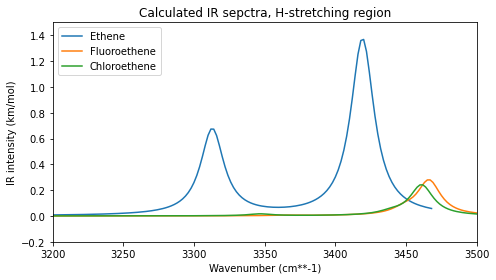

In [17]:
# Plot the IR spectra
plt.figure(figsize=(7,4))

eth_x, eth_ir = ethene_hessian_drv.frequencies, ethene_hessian_drv.ir_intensities
flo_x, flo_ir = fluoroethene_hessian_drv.frequencies, fluoroethene_hessian_drv.ir_intensities
chl_x, chl_ir = chloroethene_hessian_drv.frequencies, chloroethene_hessian_drv.ir_intensities

eth_xl, eth_irl = add_broadening(eth_x, eth_ir, line_profile='Lorentzian', line_param=20, step=2)
flo_xl, flo_irl = add_broadening(flo_x, flo_ir, line_profile='Lorentzian', line_param=20, step=2)
chl_xl, chl_irl = add_broadening(chl_x, chl_ir, line_profile='Lorentzian', line_param=20, step=2)

plt.plot(eth_xl, eth_irl, label='Ethene')
plt.plot(flo_xl, flo_irl, label='Fluoroethene')
plt.plot(chl_xl, chl_irl, label='Chloroethene')

plt.xlabel('Wavenumber (cm**-1)')
plt.axis(xmin=3200, xmax=3500)
plt.axis(ymin=-0.2, ymax=1.5)
plt.ylabel('IR intensity (km/mol)')
plt.title("Calculated IR sepctra, H-stretching region")
plt.legend()
plt.tight_layout(); plt.show()

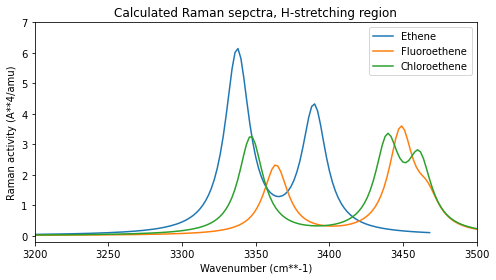

In [18]:
# Plot the Raman spectra
plt.figure(figsize=(7,4))

eth_x, eth_raman = ethene_hessian_drv.frequencies, ethene_hessian_drv.raman_intensities
flo_x, flo_raman = fluoroethene_hessian_drv.frequencies, fluoroethene_hessian_drv.raman_intensities
chl_x, chl_raman = chloroethene_hessian_drv.frequencies, chloroethene_hessian_drv.raman_intensities

eth_xl, eth_ramanl = add_broadening(eth_x, eth_raman, line_profile='Lorentzian', line_param=20, step=2)
flo_xl, flo_ramanl = add_broadening(flo_x, flo_raman, line_profile='Lorentzian', line_param=20, step=2)
chl_xl, chl_ramanl = add_broadening(chl_x, chl_raman, line_profile='Lorentzian', line_param=20, step=2)

plt.plot(eth_xl, eth_ramanl, label='Ethene')
plt.plot(flo_xl, flo_ramanl, label='Fluoroethene')
plt.plot(chl_xl, chl_ramanl, label='Chloroethene')

plt.xlabel('Wavenumber (cm**-1)')
plt.axis(xmin=3200, xmax=3500)
plt.axis(ymin=-0.2, ymax=7)
plt.ylabel('Raman activity (A**4/amu)')
plt.title("Calculated Raman sepctra, H-stretching region")
plt.legend()
plt.tight_layout(); plt.show()

In [19]:
# Get the displacements of the normal mode
ethene_h1 = get_normal_mode(ethene, ethene_hessian_drv.normal_modes[-1])
fluoroethene_h1 = get_normal_mode(fluoroethene, fluoroethene_hessian_drv.normal_modes[-1])
chloroethene_h1 = get_normal_mode(chloroethene, chloroethene_hessian_drv.normal_modes[-1])

In [20]:
# Animate the vibration
view = p3d.view(viewergrid=(1,3), width=600, height=200, linked=True)
view.addModel(ethene_h1, "xyz", {'vibrate': {'frames':10,'amplitude':0.75}}, viewer=(0,0))
view.addModel(fluoroethene_h1, "xyz", {'vibrate': {'frames':10,'amplitude':0.75}}, viewer=(0,1))
view.addModel(chloroethene_h1, "xyz", {'vibrate': {'frames':10,'amplitude':0.75}}, viewer=(0,2))
view.setStyle({'stick':{}})
view.animate({'loop': 'backAndForth'})
view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## IR intensities and Raman activities

To rationalize why the IR and Raman spectra look as they do, calculate how the dipole moment and polarizability change during particular vibrational motions. Look at the Hydrogen stretching modes and select a mode which is IR-active in ethene, but is suppressed in fluoroethene or chloroethene. What is the dipole moment in the optimized molecule? How does the dipole moment change during the vibration? 

```python
# Calculate the dipole moment of the optimized molecules
# For this we will use the FirstOrderProperties class from veloxchem
ethene_prop = vlx.firstorderprop.FirstOrderProperties()
ethene_prop.compute_scf_prop(opt_ethene, ethene_basis, ethene_scfdrv.scf_tensors)
ethene_dipole_moment = ethene_prop.get_property('dipole moment')
...

# Select normal mode and get the array of atomic displacements
...

# Use the atomic displacement array to construct several new molecular configurations
# along the vibrational mode, e.g. -0.75, -0.5, -0.25, 0.25, 0.5, 0.75 displacement 
...

# Calculate the dipole moment for the new configurations
...

# Plot as a function of displacement
...
```

Ground state dipole moments:   x             y            z       

Ethene                     : -0.00 a.u.     0.00 a.u.   -0.00 a.u.
Fluoroethene               : -0.79 a.u.     0.39 a.u.    0.00 a.u.
Chloroethene               : -0.77 a.u.     0.59 a.u.    0.00 a.u.



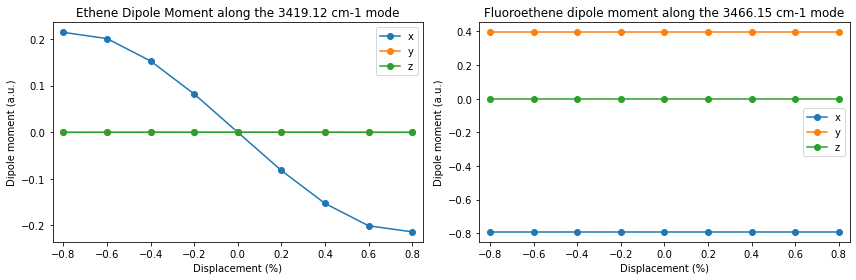

In [21]:
ethene_prop = vlx.firstorderprop.FirstOrderProperties()
ethene_prop.compute_scf_prop(opt_ethene, ethene_basis, ethene_scfdrv.scf_tensors)
ethene_dipole_moment = ethene_prop.get_property('dipole moment')

fluoroethene_prop = vlx.firstorderprop.FirstOrderProperties()
fluoroethene_prop.compute_scf_prop(opt_fluoroethene, fluoroethene_basis, fluoroethene_scfdrv.scf_tensors)
fluoroethene_dipole_moment = fluoroethene_prop.get_property('dipole moment')

chloroethene_prop = vlx.firstorderprop.FirstOrderProperties()
chloroethene_prop.compute_scf_prop(opt_chloroethene, chloroethene_basis, chloroethene_scfdrv.scf_tensors)
chloroethene_dipole_moment = chloroethene_prop.get_property('dipole moment')

print("Ground state dipole moments:   x             y            z       \n")
print("Ethene                     : %5.2f a.u.    %5.2f a.u.   %5.2f a.u." % (ethene_dipole_moment[0],
                                                           ethene_dipole_moment[1],
                                                           ethene_dipole_moment[2] ))
print("Fluoroethene               : %5.2f a.u.    %5.2f a.u.   %5.2f a.u." % (fluoroethene_dipole_moment[0],
                                                           fluoroethene_dipole_moment[1],
                                                           fluoroethene_dipole_moment[2] ))
print("Chloroethene               : %5.2f a.u.    %5.2f a.u.   %5.2f a.u." % (chloroethene_dipole_moment[0],
                                                           chloroethene_dipole_moment[1],
                                                           chloroethene_dipole_moment[2] ))
print()

ethene_moments = []
fluoroethene_moments = []

natm = opt_ethene.number_of_atoms()

new_ethene_scfdrv = vlx.scfrestdriver.ScfRestrictedDriver()
new_ethene_scfdrv.ostream.state=False
ethene_displacements = ethene_hessian_drv.normal_modes[-1].reshape(natm, 3)
ethene_labels = opt_ethene.get_labels()

new_fluoroethene_scfdrv = vlx.scfrestdriver.ScfRestrictedDriver()
new_fluoroethene_scfdrv.ostream.state=False
fluoroethene_displacements = fluoroethene_hessian_drv.normal_modes[-1].reshape(natm, 3)
fluoroethene_labels = opt_fluoroethene.get_labels()

x_list = np.arange(-0.8,0.81,0.2)

# Calculate the dipole moment for different displacements
for x in x_list:
    ethene_coords = opt_ethene.get_coordinates() * bohr_in_angstroms()
    ethene_coords += x * ethene_displacements
    new_ethene = vlx.molecule.Molecule(ethene_labels, ethene_coords, units='angstrom')
    new_ethene_scfdrv.compute(new_ethene, ethene_basis)
    ethene_prop.compute_scf_prop(new_ethene, ethene_basis, new_ethene_scfdrv.scf_tensors)
    ethene_dipole_moment = ethene_prop.get_property('dipole moment')
    ethene_moments.append(ethene_dipole_moment)

for x in x_list:
    fluoro_coords = opt_fluoroethene.get_coordinates() * bohr_in_angstroms()
    fluoro_coords += x * fluoroethene_displacements
    new_fluoroethene = vlx.molecule.Molecule(fluoroethene_labels, fluoro_coords, units='angstrom')
    new_fluoroethene_scfdrv.compute(new_fluoroethene, fluoroethene_basis)
    ethene_prop.compute_scf_prop(new_fluoroethene, fluoroethene_basis, new_fluoroethene_scfdrv.scf_tensors)
    fluoroethene_dipole_moment = fluoroethene_prop.get_property('dipole moment')
    fluoroethene_moments.append(fluoroethene_dipole_moment)
    

ethene_moments_array = np.array(ethene_moments)
fluoroethene_moments_array = np.array(fluoroethene_moments)

# Plot
figure = plt.figure(figsize=(12,4))

plt1 = figure.add_subplot(1, 2, 1)
plt.plot(x_list, ethene_moments_array[:,0], '-o', label='x')
plt.plot(x_list, ethene_moments_array[:,1], '-o', label='y')
plt.plot(x_list, ethene_moments_array[:,2], '-o', label='z')
plt.axis(xmin=-0.85, xmax=0.85)
plt.xlabel('Displacement (%)')
plt.ylabel('Dipole moment (a.u.)')
plt.title("Ethene Dipole Moment along the %.2f cm-1 mode" % ethene_hessian_drv.frequencies[-1])
plt.legend()

plt2 = figure.add_subplot(1, 2, 2)
plt.plot(x_list, fluoroethene_moments_array[:,0], '-o', label='x')
plt.plot(x_list, fluoroethene_moments_array[:,1], '-o', label='y')
plt.plot(x_list, fluoroethene_moments_array[:,2], '-o', label='z')
plt.axis(xmin=-0.85, xmax=0.85)
plt.xlabel('Displacement (%)')
plt.ylabel('Dipole moment (a.u.)')
plt.title("Fluoroethene dipole moment along the %.2f cm-1 mode" % fluoroethene_hessian_drv.frequencies[-1])
plt.legend()

plt.tight_layout(); plt.show()

Now select a mode which is Raman-active in ethene, but is suppressed in fluoroethene or chloroethene. Calculate the polarizability of the optimized molecule. How does the polarizability change during the vibration? 

```python
# Calculate the polarizability of the optimized molecules
# For this, we need to run a linear response calculation
ethene_lrdrv = vlx.lrsolver.LinearResponseSolver()
ethene_pol_dict = ethene_lrdrv.compute(opt_ethene, ethene_basis, ethene_scfdrv.scf_tensors)
ethene_polarizability = ethene_pol_dict['response_functions']
...

# Select normal mode and get the array of atomic displacements
...

# Use the atomic displacement array to construct several new molecular configurations
# along the vibrational mode, e.g. -0.75, -0.5, -0.25, 0.25, 0.5, 0.75 displacement 
...

# Calculate the polarizability for the new configurations
...

# Plot component or norm as a function of displacement
...
```

Ground state polarizabilities:    xx             yy           zz

Ethene                       : -19.19 a.u.    -32.45 a.u.   -7.15 a.u.
Fluoroethene                 : -18.86 a.u.    -30.62 a.u.   -7.81 a.u.
Chloroethene                 : -31.94 a.u.    -41.05 a.u.   -10.12 a.u.



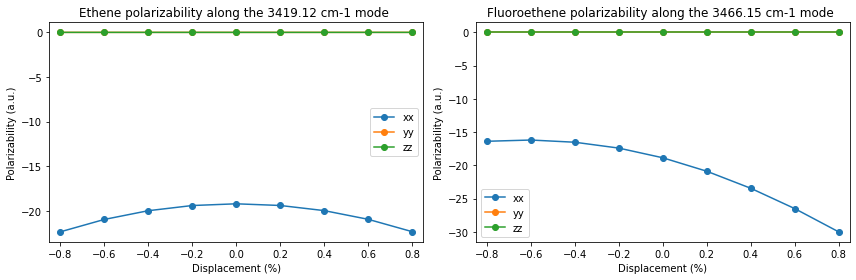

In [22]:
# Calculate the polarizability of the optimized molecules
# For this, we need to run a linear response calculation
ethene_lrdrv = vlx.lrsolver.LinearResponseSolver()
ethene_lrdrv.ostream.state = False
ethene_pol_dict = ethene_lrdrv.compute(opt_ethene, ethene_basis, ethene_scfdrv.scf_tensors)
ethene_polarizability = ethene_pol_dict['response_functions']

fluoroethene_lrdrv = vlx.lrsolver.LinearResponseSolver()
fluoroethene_lrdrv.ostream.state = False
fluoroethene_pol_dict = fluoroethene_lrdrv.compute(opt_fluoroethene, fluoroethene_basis, fluoroethene_scfdrv.scf_tensors)
fluoroethene_polarizability = fluoroethene_pol_dict['response_functions']

chloroethene_lrdrv = vlx.lrsolver.LinearResponseSolver()
chloroethene_lrdrv.ostream.state = False
chloroethene_pol_dict = chloroethene_lrdrv.compute(opt_chloroethene, chloroethene_basis, chloroethene_scfdrv.scf_tensors)
chloroethene_polarizability = chloroethene_pol_dict['response_functions']

print("Ground state polarizabilities:    xx             yy           zz\n")
print("Ethene                       : %5.2f a.u.    %5.2f a.u.   %5.2f a.u."  % (ethene_polarizability[('x','x',0)],
                                                           ethene_polarizability[('y','y',0)],
                                                           ethene_polarizability[('z','z',0)]))
print("Fluoroethene                 : %5.2f a.u.    %5.2f a.u.   %5.2f a.u." % (fluoroethene_polarizability[('x','x',0)],
                                                           fluoroethene_polarizability[('y','y',0)],
                                                           fluoroethene_polarizability[('z','z',0)]))
print("Chloroethene                 : %5.2f a.u.    %5.2f a.u.   %5.2f a.u." % (chloroethene_polarizability[('x','x',0)],
                                                           chloroethene_polarizability[('y','y',0)],
                                                           chloroethene_polarizability[('z','z',0)]))
print()

# Save polarizability dictionary keys
keys = ethene_pol_dict['response_functions'].keys()

ethene_pol = []
fluoroethene_pol = []

# Create new linear response solvers to re-calculate the polarizabilities
new_ethene_lrdrv = vlx.lrsolver.LinearResponseSolver()
new_ethene_lrdrv.ostream.state = False

new_fluoroethene_lrdrv = vlx.lrsolver.LinearResponseSolver()
new_fluoroethene_lrdrv.ostream.state = False

# Calculate the polarizability for different displacements
for x in x_list:
    ethene_coords = opt_ethene.get_coordinates() * bohr_in_angstroms()
    ethene_coords += x * ethene_displacements
    new_ethene = vlx.molecule.Molecule(ethene_labels, ethene_coords, units='angstrom')
    new_ethene_scfdrv.compute(new_ethene, ethene_basis)

    new_ethene_lrdrv.is_converged = False
    new_ethene_pol_dict = new_ethene_lrdrv.compute(new_ethene, ethene_basis, new_ethene_scfdrv.scf_tensors)
    
    ethene_polarizability = np.zeros((9))
    i = 0
    for key in keys:
        ethene_polarizability[i] = new_ethene_pol_dict['response_functions'][key]
        i += 1
    ethene_pol.append(ethene_polarizability.reshape(3,3))

for x in x_list:
    fluoro_coords = opt_fluoroethene.get_coordinates() * bohr_in_angstroms()
    fluoro_coords += x * fluoroethene_displacements
    new_fluoroethene = vlx.molecule.Molecule(fluoroethene_labels, fluoro_coords, units='angstrom')
    new_fluoroethene_scfdrv.compute(new_fluoroethene, fluoroethene_basis)

    new_fluoroethene_lrdrv.is_converged = False
    new_fluoroethene_pol_dict = new_fluoroethene_lrdrv.compute(new_fluoroethene, fluoroethene_basis, new_fluoroethene_scfdrv.scf_tensors)
    
    fluoroethene_polarizability = np.zeros((9))
    i = 0
    for key in keys:
        fluoroethene_polarizability[i] = new_fluoroethene_pol_dict['response_functions'][key]
        i += 1
    fluoroethene_pol.append(fluoroethene_polarizability.reshape(3,3))

ethene_polarizability_array = np.array(ethene_pol)
fluoroethene_polarizability_array = np.array(fluoroethene_pol)

figure = plt.figure(figsize=(12,4))

# Plot
plt1 = figure.add_subplot(1, 2, 1)
plt.plot(x_list, ethene_polarizability_array[:,0,0], '-o', label='xx')
plt.plot(x_list, ethene_polarizability_array[:,1,1], '-o', label='yy')
plt.plot(x_list, ethene_polarizability_array[:,2,2], '-o', label='zz')
plt.axis(xmin=-0.85, xmax=0.85)
plt.xlabel('Displacement (%)')
plt.ylabel('Polarizability (a.u.)')
plt.title("Ethene polarizability along the %.2f cm-1 mode " % (ethene_hessian_drv.frequencies[-1]))
plt.legend()

plt2 = figure.add_subplot(1, 2, 2)
plt.plot(x_list, fluoroethene_polarizability_array[:,0,0], '-o', label='xx')
plt.plot(x_list, fluoroethene_polarizability_array[:,1,1], '-o', label='yy')
plt.plot(x_list, fluoroethene_polarizability_array[:,2,2], '-o', label='zz')
plt.axis(xmin=-0.85, xmax=0.85)
plt.xlabel('Displacement (%)')
plt.ylabel('Polarizability (a.u.)')
plt.title("Fluoroethene polarizability along the %.2f cm-1 mode " % (fluoroethene_hessian_drv.frequencies[-1]))
plt.legend()

plt.tight_layout(); plt.show()